In [129]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 
plt.style.use('ggplot')

import numpy as np

### 1. Question Phase: 
-  Define problems:
    1. Predict grade or sub_grade assigned by LC (Classification Problem)
    2. Predict loan status (Classification Problem)
    3. Predict int_rate (Regression)

### 2. Modeling Phase:
-  Clean data 
-  Explore data
    1. Type of variable: predictors (aka features), response (aka target)
    2. Data type: character, numeric, object (string)
    3. Variable category: continuous vs. categorical 
-  Build model 

### 3. Validation Phase:
-  Validate / test the model

### 4. Conclusion Phase:
-  Present analysis result 

In [3]:
loan = pd.read_csv('../lending-club-loan-data/loan.csv', header=0)
loan.head(5)

/Users/ZiweiMengyang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
col_info = pd.read_excel('../lending-club-loan-data/LCDataDictionary.xlsx')
col_info

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...
2,annual_inc_joint,The combined self-reported annual income provi...
3,application_type,Indicates whether the loan is an individual ap...
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding m...
6,delinq_2yrs,The number of 30+ days past-due incidences of ...
7,desc,Loan description provided by the borrower
8,dti,A ratio calculated using the borrower’s total ...
9,dti_joint,A ratio calculated using the co-borrowers' tot...


### Post-Booking Account Features
-  loan_amnt
-  term
-  int_rate
-  loan_status

### Bureau Features

### Lending Club Generated Scores/Rating
- grade 
- sub-grade

In [72]:
# loan data has 74 features
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [23]:
# I define all the bucketing functions here:
def amt_bucket(x):
    if x < 5000:
        label = '1. <5000'
    elif x < 25000:
        label = '2. 5000 - <25000'
    elif x < 30000:
        label = '3. 25000 - <30000'
    elif x < 35000:
        label = '4. 30000 - <35000'
    else:
        label = '5. 35000'
        
    return label 
    

In [22]:
loan['loan_status'].value_counts(normalize=True)

Current                                                0.678153
Fully Paid                                             0.234086
Charged Off                                            0.050991
Late (31-120 days)                                     0.013062
Issued                                                 0.009534
In Grace Period                                        0.007047
Late (16-30 days)                                      0.002656
Does not meet the credit policy. Status:Fully Paid     0.002240
Default                                                0.001374
Does not meet the credit policy. Status:Charged Off    0.000858
Name: loan_status, dtype: float64

In [13]:
loan['pymnt_plan'].value_counts(normalize=True) 
# too concentrated to be informative

n    0.999989
y    0.000011
Name: pymnt_plan, dtype: float64

In [24]:
loan['term'].value_counts(normalize=True)

 36 months    0.699955
 60 months    0.300045
Name: term, dtype: float64

In [21]:
loan['loan_amnt'].apply(lambda x: amt_bucket(x)).value_counts(normalize=True).sort_index()

1. <5000             0.085097
2. 5000 - <25000     0.770893
3. 25000 - <30000    0.068265
4. 30000 - <35000    0.034762
5. 35000             0.040984
Name: loan_amnt, dtype: float64

# Explore Data 
## -  Label target vs. features
## -  Data type:
-  Numerical: continuous vs. discrete
-  Categorical: ordinal (e.g. grade) vs. norminal  

## -  Explore distribution of features
## -  Missing value treatment  
-  Remove features with too many missing value, or remove all rows with NA if you have abundant data.
-  If not missing at random, add new level to represent NA, or impute with 0, or generate new feature.
-  If missing at random, then impute using summary statistics, or model with the remaining features. 

In [108]:
response = loan['int_rate']
features = loan[[x for x in loan.columns.tolist() if x != 'int_rate']]
# don't know why list.remove('int_rate') does not work ..
print(response.shape)
print(features.shape)

(887379,)
(887379, 73)


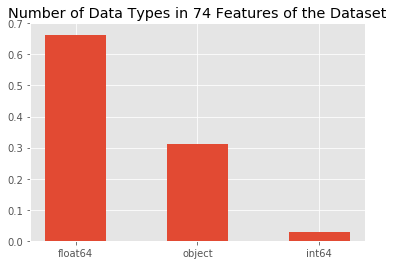

In [141]:
plt.bar(x = np.arange(3), height = loan.dtypes.value_counts(normalize=True).values, width = 0.5)

plt.xticks(np.arange(3), loan.dtypes.value_counts().index)
plt.yticks(np.arange(0, 0.71, 0.1))
plt.title('Number of Data Types in {} Features of the Dataset'.format(loan.shape[1]))
plt.show()

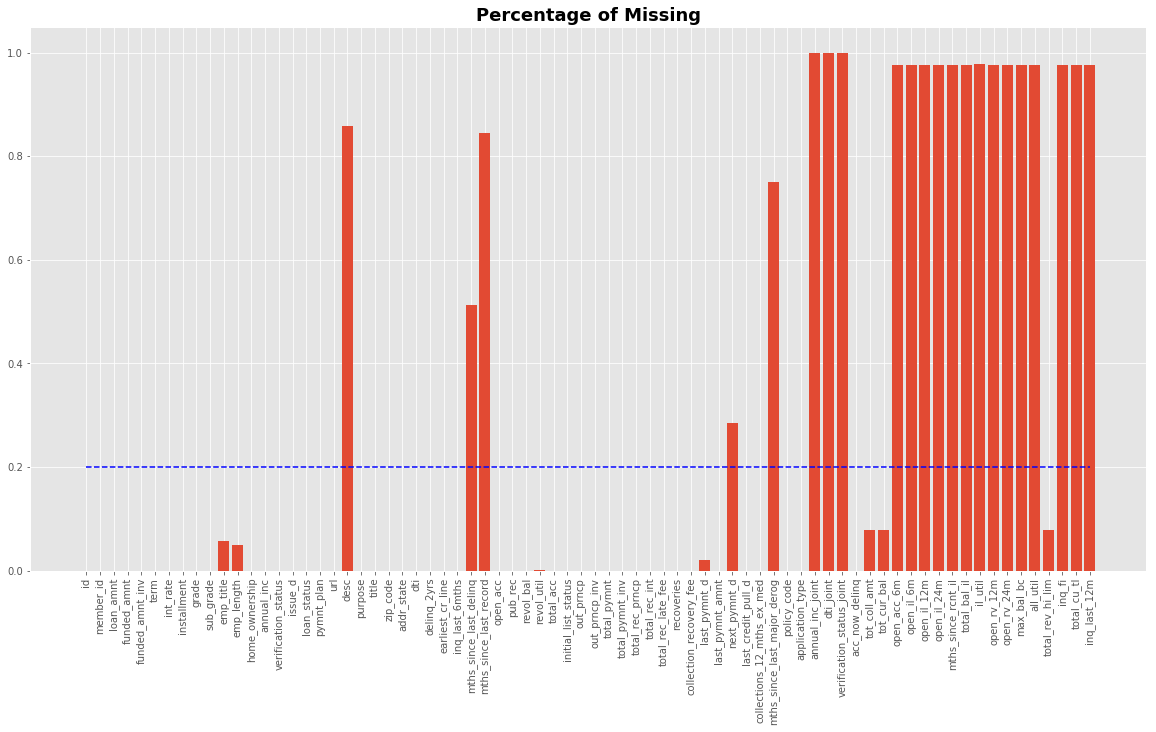

In [154]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

plt.title('Percentage of Missing', fontsize = 18, fontweight='bold')
plt.bar(np.arange(loan.shape[1]), loan.isnull().sum()/float(loan.shape[0]))
plt.xticks(np.arange(loan.shape[1]), loan.columns.tolist(), rotation = 'vertical')

plt.plot([0, loan.shape[1]], [0.2, 0.2], 'b--')
plt.show()

In [174]:
feature_df = pd.DataFrame(list(zip(loan.columns.tolist(), (loan.isnull().sum()/float(loan.shape[0])))), 
                 columns=['Feature', '% of missing']) \
                .sort_values(by=['% of missing'], ascending=False)

feature_df

,Feature,% of missing
54,dti_joint,0.999426
53,annual_inc_joint,0.999424
55,verification_status_joint,0.999424
65,il_util,0.979020
63,mths_since_rcnt_il,0.976549
59,open_acc_6m,0.975916
60,open_il_6m,0.975916
61,open_il_12m,0.975916
62,open_il_24m,0.975916
64,total_bal_il,0.975916


In [194]:
# when dti_joint is null, dti is NOT null. When dti_joint is not null, dti_joint reflects dti under multiple borrowers
# same as annual_inc_joint, verification_status_joint
# therefore, when those 3 variables are not null, should use them as opposed to the non-joint counterparts.  
loan.loc[~loan['annual_inc_joint'].isnull(), ['annual_inc_joint', 'annual_inc']]

,annual_inc_joint,annual_inc
466289,71000.00,63000.00
466419,100000.00,75000.00
466741,77000.00,65000.00
466850,117000.00,96000.00
466914,94348.32,29524.32
467004,113314.00,43435.00
467010,61366.44,37534.44
467197,192000.00,150000.00
467558,49748.00,38000.00
467775,72000.00,57000.00


In [172]:
print(loan[loan['all_util']==0].shape[0]/loan.shape[0])
print(loan['all_util'].describe())

1.5776798864972013e-05
count    21372.000000
mean        60.831939
std         20.013254
min          0.000000
25%         47.700000
50%         61.900000
75%         75.200000
max        151.400000
Name: all_util, dtype: float64


### Missing means no derogs --> missing is then a category --> bins the variable, or creates a flag-variable
-  'mths_since_last_delinq'
-  'mths_since_last_major_derog'
-  'mths_since_last_record'
-  

### Missing because of 'joint' 
-  'dti_joint'
-  'annual_inc_joint'
-  'verification_status_joint'

### Delete variable with too many missing due to unable to collect such info:
-  'desc'

### Unclear why missing--> Delete  (I found a few var % missing = 0.975716, my guess is these var only appear on a certain group of accounts, I delete all these variables since they don't apply to most obs
-  'total_cu_tl' (finance trade')
-  'inq_fi'
-  'all_util'


In [196]:
loan['dti_final'] = loan['dti_joint'].fillna(loan['dti'])
loan['dti_final'].isnull().sum()

0

In [197]:
loan['annual_inc_final'] = loan['annual_inc_joint'].fillna(loan['annual_inc'])
loan['annual_inc_final'].isnull().sum()

4

In [199]:
loan['verification_status_final'] = loan['verification_status_joint'].fillna(loan['verification_status'])
loan['verification_status_final'].isnull().sum()

0

In [245]:
feature_final = feature_df.loc[feature_df['% of missing']<=0.85, ['Feature']].values.flatten().tolist() \
                + ['dti_final', 'annual_inc_final', 'verification_status_final']

feature_final.remove('dti')
feature_final.remove('annual_inc')
feature_final.remove('verification_status')

print(len(feature_final))

56


In [290]:
# output data to csv 
loan[feature_final].to_csv('loan_reduced_features.csv', index=False)

### *OUTPUT: feature_final includes int_rate, removes variables that have NaN unplausible, and fillna missing with 'joint' *

In [252]:
print(loan['int_rate'].describe())
print('\n Standard Deviation {}'.format(loan['int_rate'].std()))

count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

 Standard Deviation 4.381867414721592


#### Interpretation: median slightly < mean, positively skewed, but not strong

# Explore int_rate

In [253]:
import matplotlib.mlab as mlab

(array([4.86758379e-02, 1.95198489e-03, 6.20683586e-02, 3.67639691e-02,
        3.87683243e-02, 3.89778056e-02, 5.78977763e-02, 2.86894170e-02,
        4.75094079e-02, 5.67456291e-02, 1.74317012e-01, 1.06645028e-03,
        1.40719067e-01, 7.01286279e-03, 1.69537029e-02, 5.67646728e-02,
        1.26883779e-01, 1.80487188e-02, 5.42413753e-02, 1.07759088e-01,
        5.13133980e-02, 2.41570033e-02, 3.56641923e-02, 1.67789765e-01,
        4.55717058e-02, 2.37428016e-02, 1.46594065e-01, 4.19914799e-03,
        1.30973425e-01, 1.28483454e-01, 6.98572544e-02, 1.05511925e-01,
        1.36162849e-01, 1.44475448e-01, 1.95293708e-02, 8.07740870e-02,
        1.39214610e-01, 7.06380484e-02, 9.57043910e-02, 8.70537652e-02,
        6.39870169e-02, 2.16575104e-02, 5.57363101e-02, 1.39181284e-01,
        3.72114974e-02, 2.60328131e-02, 6.05877067e-02, 7.78651534e-02,
        1.35496317e-02, 9.94940982e-02, 2.39284782e-02, 9.56472597e-02,
        7.39754665e-02, 4.50384807e-03, 7.90030178e-02, 5.599340

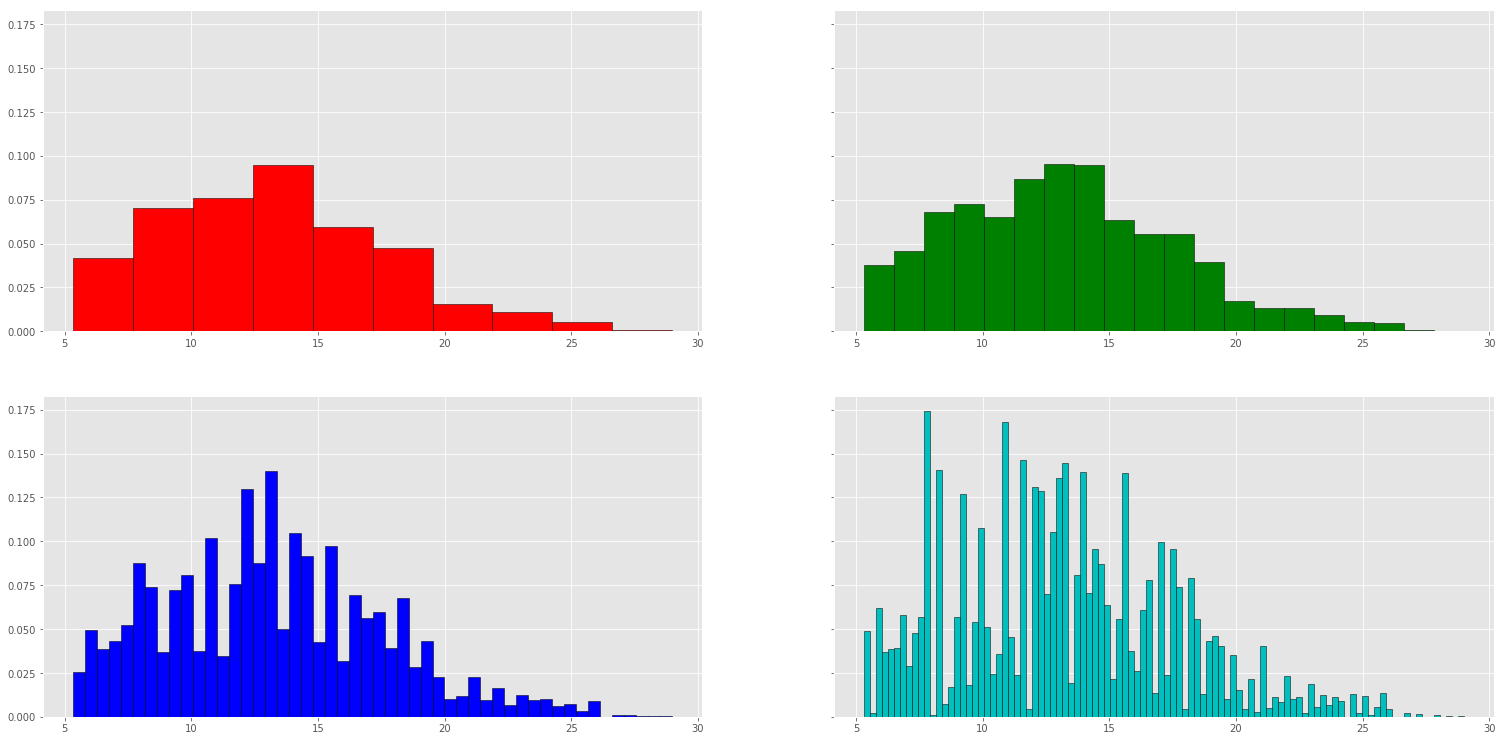

In [259]:
fig, axes = plt.subplots(2,2, sharey=True, figsize=(26,13))
axes[0,0].hist(loan['int_rate'], bins=10, density=True, facecolor='r', edgecolor='k')
axes[0,1].hist(loan['int_rate'], bins=20, density=True, facecolor='g', edgecolor='k')
axes[1,0].hist(loan['int_rate'], bins=50, density=True, facecolor='b', edgecolor='k')
axes[1,1].hist(loan['int_rate'], bins=100, density=True, facecolor='c', edgecolor='k')

## *Finding: interest rate has multiple modes, is not a smooth line. Usually each mode is a group. We observed many peaks, which indicates this is a multi-modal distribution, and there are different patterns inside this distribution. i.e. this is a distribution mixture of several sub-distributions, caused by multiple groups.*

## --> Next: Group Analysis on int_rate

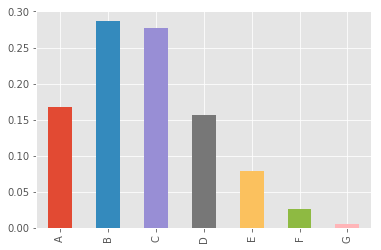

In [266]:
loan['grade'].value_counts(normalize=True).sort_index().plot('bar')

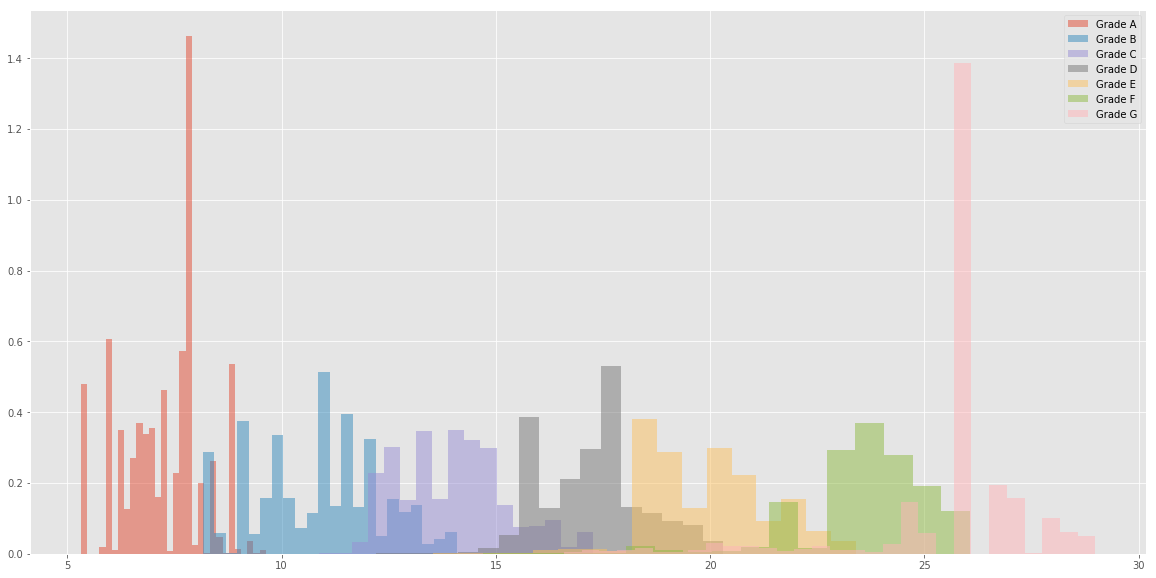

In [282]:
A_int_rate = loan.loc[loan['grade']=='A', 'int_rate']
B_int_rate = loan.loc[loan['grade']=='B', 'int_rate']
C_int_rate = loan.loc[loan['grade']=='C', 'int_rate']
D_int_rate = loan.loc[loan['grade']=='D', 'int_rate']
E_int_rate = loan.loc[loan['grade']=='E', 'int_rate']
F_int_rate = loan.loc[loan['grade']=='F', 'int_rate']
G_int_rate = loan.loc[loan['grade']=='G', 'int_rate']


kwargs = dict(histtype='stepfilled', alpha=0.5, density=True, bins=30)
plt.subplots(1,1, figsize=(20,10))
plt.hist(A_int_rate, **kwargs, label='Grade A')
plt.hist(B_int_rate, **kwargs, label='Grade B')
plt.hist(C_int_rate, **kwargs, label='Grade C')
plt.hist(D_int_rate, **kwargs, label='Grade D')
plt.hist(E_int_rate, **kwargs, label='Grade E')
plt.hist(F_int_rate, **kwargs, label='Grade F')
plt.hist(G_int_rate, **kwargs, label='Grade G')

plt.legend()


(array([  33.,   44.,   47.,   35.,  122.,   89.,   51.,   72.,   38.,
         396.,  135., 3142.,  800.,  234.,  251.]),
 array([16.59      , 17.41666667, 18.24333333, 19.07      , 19.89666667,
        20.72333333, 21.55      , 22.37666667, 23.20333333, 24.03      ,
        24.85666667, 25.68333333, 26.51      , 27.33666667, 28.16333333,
        28.99      ]),
 <a list of 1 Patch objects>)

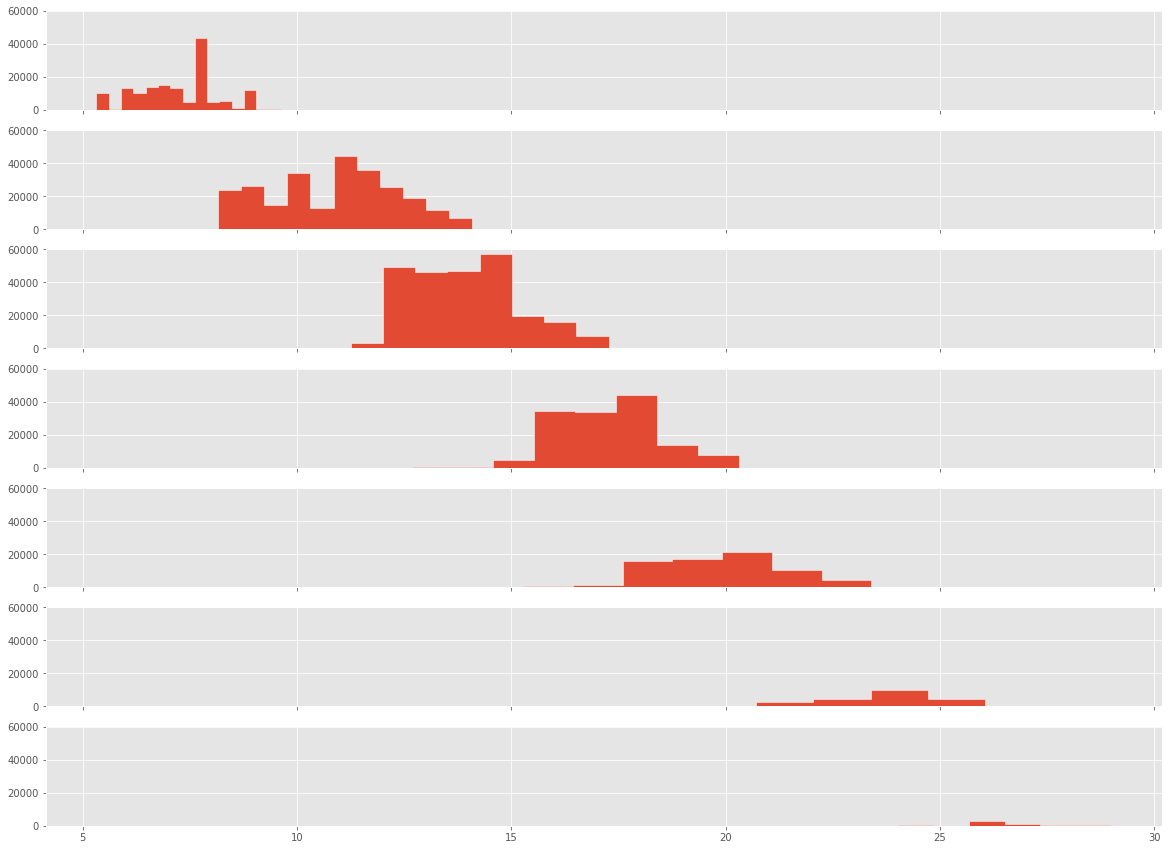

In [287]:
kwargs = dict(edgecolor='w',histtype='stepfilled', bins=15)
fig, axes = plt.subplots(7,1,figsize=(20,15), sharex=True, sharey=True)
axes[0].hist(A_int_rate, **kwargs, label='Grade A')
axes[1].hist(B_int_rate, **kwargs, label='Grade B')
axes[2].hist(C_int_rate, **kwargs, label='Grade C')
axes[3].hist(D_int_rate, **kwargs, label='Grade D')
axes[4].hist(E_int_rate, **kwargs, label='Grade E')
axes[5].hist(F_int_rate, **kwargs, label='Grade F')
axes[6].hist(G_int_rate, **kwargs, label='Grade G')